## Lomb Scargle I Problem Set Solutions


In general, you can see from this example that convolving with a Gaussian tends to give a "smoother" result, while the top hat function can give a result that has sharper jumps up and down. 



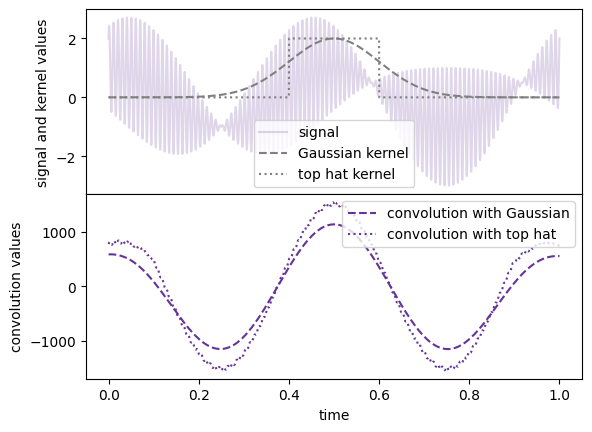

In [65]:
# Problem 2
import numpy as np
import matplotlib.pyplot as plt

# plot a few sinusoids
period1 = 1 / 2
period2 = 1 / 103
period3 = 1 / 100

times = np.linspace(0, 1, int(5e3))
signal = (
    np.cos(2 * np.pi * times / period1)
    + np.sin(2 * np.pi * times / period2)
    + np.cos(2 * np.pi * times / period3)
)
fig, ax = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(hspace=0)
ax[0].plot(times, signal, label="signal", color="rebeccapurple", alpha=0.2)
ax[1].set_xlabel("time")

# convolve the function with a Gaussian kernel
sigma = 0.1  # TODO (you, yes you!): play with this value to investigate how it affects the convolution
gaussian_kernel = 2 * np.exp(-0.5 * ((times - 0.5) / sigma) ** 2)
gaussian_convolved_signal = np.convolve(signal, gaussian_kernel, mode="same")

ax[0].plot(times, gaussian_kernel, label="Gaussian kernel", color="grey", ls="--")
ax[1].plot(
    times,
    gaussian_convolved_signal,
    label="convolution with Gaussian",
    color="rebeccapurple",
    ls="--",
)

# convolve the function with a top hat kernel
sqaure_width = 0.1  # TODO (you, yes you!): play with this value to investigate how it affects the convolution
square_kernel = np.zeros_like(gaussian_kernel)
square_kernel[(times > 0.5 - sqaure_width) & (times < 0.5 + sqaure_width)] = 2
ax[0].plot(times, square_kernel, label="top hat kernel", color="grey", ls=":")
square_convolved_signal = np.convolve(signal, square_kernel, mode="same")
ax[1].plot(
    times,
    square_convolved_signal,
    label="convolution with top hat",
    color="rebeccapurple",
    ls=":",
)

ax[0].legend()
ax[0].set_ylabel("signal and kernel values")
ax[1].set_ylabel("convolution values")
ax[1].legend()

print(
    """
In general, you can see from this example that convolving with a Gaussian tends to give a "smoother" result, while the top hat function can give a result that has sharper jumps up and down. 
"""
)

b: I see a signal at the frequency of the sinusoid-- 1/(10 hours)!
c: I see the same major signal at 1/(10 hours), and I also see sampling in a symmetric 'comb' around the major signal.
d: as you can see in this plot, the aliases are at f + N * f0, where N is an integer. For N=1, we see the major aliases: 1/(10 hours) + 1/(24 hours) = 0.1417 hours^-1.


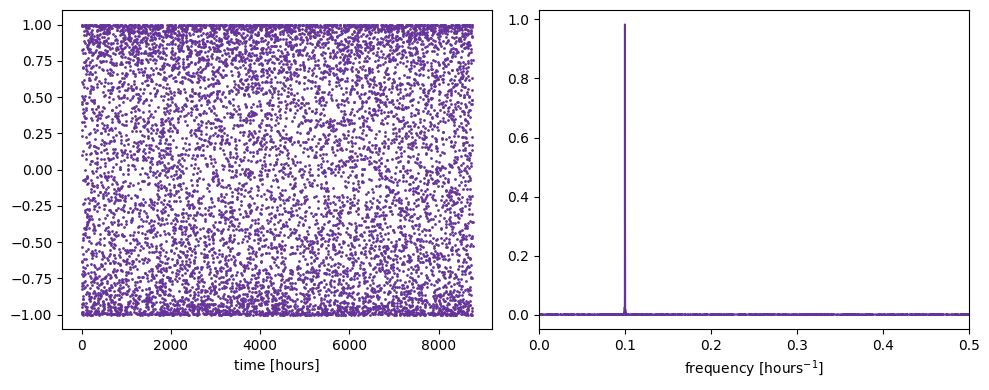

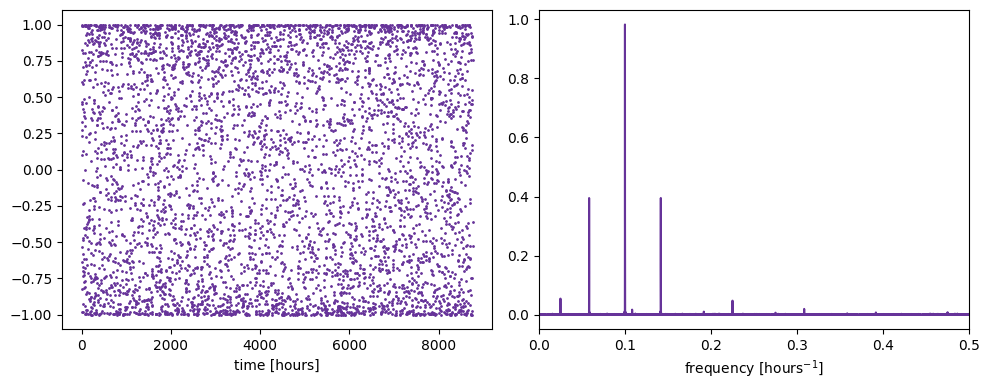

In [71]:
# Problem 3
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

# generate random data over 1 year
num_samples = 10_000
hours_per_year = 365.25 * 24
times = np.random.uniform(0, hours_per_year, size=num_samples)  # [units = hours]

period = 10  # [units = hours]
measurements = np.sin(2 * np.pi * times / period)

# compute the LombScargle periogoram
frequency, power = LombScargle(times, measurements).autopower()

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(times, measurements, color="rebeccapurple", s=1)
ax[1].plot(frequency, power, color="rebeccapurple")
ax[1].set_xlabel("frequency [hours$^{-1}$]")
ax[0].set_xlabel("time [hours]")
ax[1].set_xlim(0, 0.5)
plt.tight_layout()
print("b: I see a signal at the frequency of the sinusoid-- 1/(10 hours)!")

# mask out data taken during the day (pretending the day is 12am-12pm...)
nighttime_mask = times % 24 < 12

frequency_nightonly, power_nightonly = LombScargle(
    times[nighttime_mask], measurements[nighttime_mask]
).autopower()

print(
    "c: I see the same major signal at 1/(10 hours), and I also see sampling in a symmetric 'comb' around the major signal."
)

print(
    "d: as you can see in this plot, the aliases are at f + N * f0, where N is an integer. For N=1, we see the major aliases: 1/(10 hours) + 1/(24 hours) = 0.1417 hours^-1."
)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(
    times[nighttime_mask], measurements[nighttime_mask], color="rebeccapurple", s=1
)
ax[1].plot(frequency_nightonly, power_nightonly, color="rebeccapurple")
ax[1].set_xlabel("frequency [hours$^{-1}$]")
ax[0].set_xlabel("time [hours]")
ax[1].set_xlim(0, 0.5)
plt.tight_layout()